In [1]:
import os
import glob
import pandas as pd
import pydot
from IPython.display import SVG

In [2]:
dfs = []
tetrad_images_dir = os.path.join(os.getcwd(), '..', 'data', '9var')
for d in glob.glob(tetrad_images_dir + os.sep + "*.txt"):
    print d
    df = pd.read_table(d, sep="\t")
    dfs.append(df)

/home/jovyan/py-causal/example/../data/9var/sub016.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub009.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub005.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub010.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub013.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub017.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub014.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub001.cent-table.9.dat.txt
/home/jovyan/py-causal/example/../data/9var/sub004.cent-table.9.dat.txt


In [3]:
from pycausal import pycausal as pc
pc.start_vm()

In [4]:
from pycausal import search as s
fges = s.imagesSemBic(dfs, verbose = True)

In [5]:
fges.getNodes()

[u'LOCC', u'LACC', u'LIFG', u'LIPL', u'ROCC', u'RACC', u'RIFG', u'RIPL', u'I']

In [6]:
fges.getEdges()

[u'LIPL --- LIFG',
 u'LIFG --> LACC',
 u'LIPL --- RIPL',
 u'RIPL --> RIFG',
 u'ROCC --- LOCC',
 u'LIPL --- LOCC',
 u'ROCC --> LACC',
 u'LIFG --> RIFG',
 u'LACC --> RACC',
 u'RIPL --> RACC',
 u'LOCC --- I']

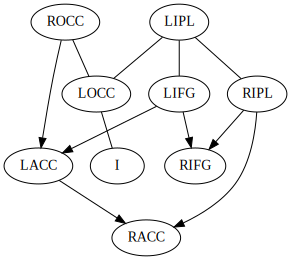

In [7]:
dot = fges.getDot()
svg_str = dot.create_svg(prog='dot')
SVG(svg_str)

In [8]:
tetradGraph = fges.getTetradGraph()
lofs = s.lofs(tetradGraph, dfs, dataType = 0, rule = 'RSkewE', score = 'entropy')

In [9]:
lofs.getEdges()

[u'LIPL --> LIFG',
 u'LIFG --> LACC',
 u'RIPL --> LIPL',
 u'RIPL --> RIFG',
 u'ROCC --> LOCC',
 u'LIPL --> LOCC',
 u'ROCC --> LACC',
 u'LIFG --> RIFG',
 u'RACC --> LACC',
 u'RACC --> RIPL',
 u'I --> LOCC']

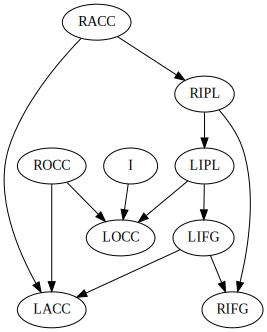

In [10]:
dot = lofs.getDot()
svg_str = dot.create_svg(prog='dot')
SVG(svg_str)

In [11]:
pc.stop_vm()